This notebook is an analysis of the reproductive size trade off 4x5 run. 
There are seven PFTs that differ only in their reproductive size.


In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Illustrate parameter file

In [2]:
pfile='/glade/u/home/rfisher/python_scripts/fix7trop_htrepro.nc'
pfile='/glade/u/home/rfisher/python_scripts/fates_6pft_BET_freezetol.nc'
pfile='/glade/u/home/rfisher/python_scripts/fates_6pft_BET_bugtest.nc'
pfile='/glade/u/home/rfisher/python_scripts/fates_6pft_BET_amt.nc'
params=xr.open_dataset(pfile)

#print(params.fates_seed_dbh_repro_threshold)
print(params.fates_mort_freezetol)

<xarray.DataArray 'fates_mort_freezetol' (fates_pft: 5)>
array([-10., -15., -20., -30., -40.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      NA
    long_name:  minimum temperature tolerance (NOT USED)


Variables to -not- read (to speed up process)

In [3]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

Read in single month of data from end of simulation. 

In [4]:
run = 'testnextapi_f45_fates'
#run = 'testnextapi_f45_fates_dens_v_smpsc'
run = 'testnextapi_f45_fates_dens_v_bark'
#run = 'testnextapi_f45_fates_dens_v_ft'
#run = 'testnextapi_f45_fates_bugtest'
run ='testnextapi_f45_fates_rl_vs_smpsc'
run ='testnextapi_f45_fates_amt'
run ='testnextapi_f45_fates_amt_nofire'
#run ='testnextapi_f45_fates_amt_fire_restart'
scratch = '/glade/scratch/rfisher/'


Read in timeseries data from archive. 

In [5]:
arc= scratch + 'archive/' + run + '/lnd/hist/' + run + '.clm2.h0.'
arc= scratch+ run + '/run/' + run + '.clm2.h0.'
print(arc)
print(datetime.datetime.now())
ds8 = xr.open_mfdataset(arc + '00*-*.nc', drop_variables=drop, decode_times=False)


/glade/scratch/rfisher/testnextapi_f45_fates_amt_nofire/run/testnextapi_f45_fates_amt_nofire.clm2.h0.
2019-07-31 08:08:41.400092


Plot timeseries evolutions of  of maps of fractional quantities (takes up a lot of space so commented it out)

In [6]:
pb = ds8.PFTbiomass[:,0:6,:,:] 
sumB=np.sum(pb,1)
pb = pb[:,0,:,:]/sumB
pb.attrs['standard_name'] = 'frac indiv PFT1'
#pb.plot(x='lon', y='lat', col='time', col_wrap=3 ,robust=True)

Plot out timeseries from specific sites. 

In [7]:
lat=ds8.lat
c=lat.isel(lat=[-5, 5],)
print(c)


lats = [21,22]
lons = [56, 57, 58, 60, 61, 62 ]
pft=[0,1,2,3,4,5]

<xarray.DataArray 'lat' (lat: 2)>
array([ 74., -70.], dtype=float32)
Coordinates:
  * lat      (lat) float32 74.0 -70.0
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north


Biomass: Illustrates eventual dominance of reproductive strategy. PFT1 in blue, PFT2 in orange, etc. (adding legend messes up plot in a way I don't have the python skillz to fix yet)

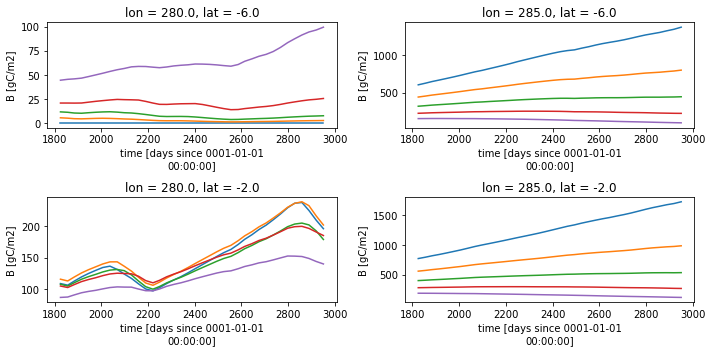

In [8]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.PFTbiomass.attrs['long_name'] = 'B'
ds8.PFTbiomass.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='linear')
ds8.PFTbiomass.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='linear')
ds8.PFTbiomass.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='linear')
ds8.PFTbiomass.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='linear')
plt.tight_layout()
plt.draw()

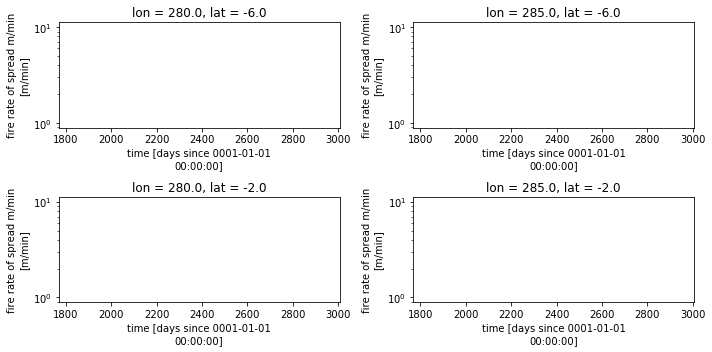

In [9]:

fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.FIRE_ROS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.FIRE_ROS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.FIRE_ROS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.FIRE_ROS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

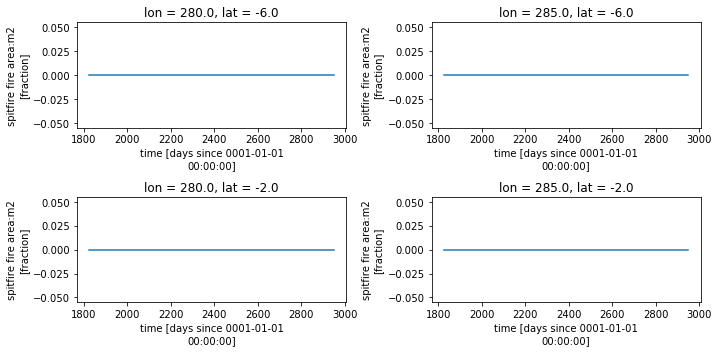

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.FIRE_AREA.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.FIRE_AREA.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.FIRE_AREA.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.FIRE_AREA.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

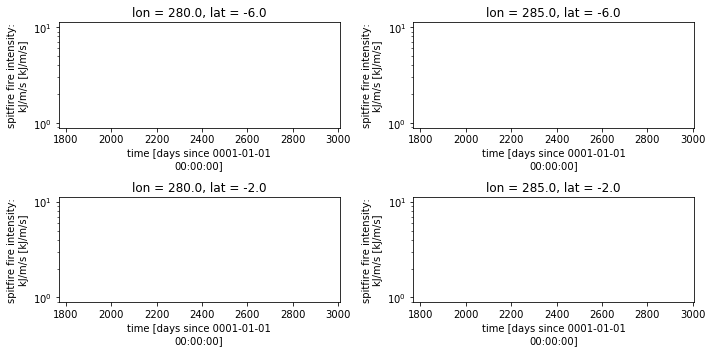

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.FIRE_INTENSITY.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.FIRE_INTENSITY.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.FIRE_INTENSITY.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.FIRE_INTENSITY.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

Individuals: Huge advantage for smallest PFT 

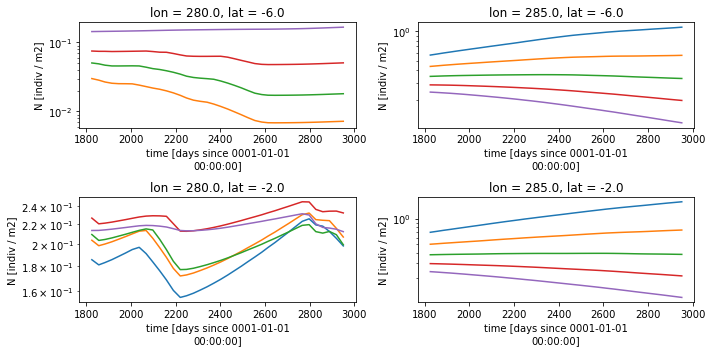

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.PFTnindivs.attrs['long_name'] = 'N'
ds8.PFTnindivs.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.PFTnindivs.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.PFTnindivs.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.PFTnindivs.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

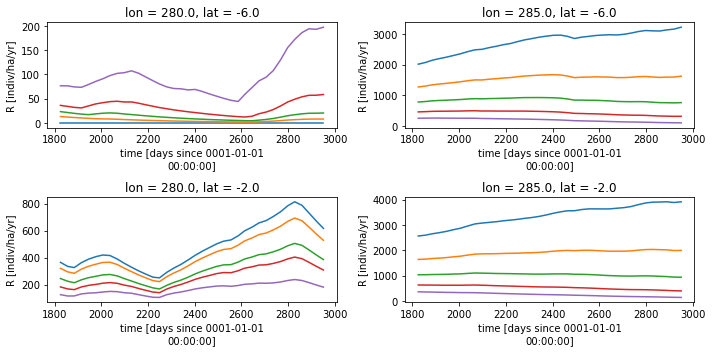

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.RECRUITMENT.attrs['long_name'] = 'R'
ds8.RECRUITMENT.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

This is TOTAL mortality, with a corresponding peak in rates. 
Note also the massive numbers here.  They are massively higher than any of the outputs for the different mortality types. 

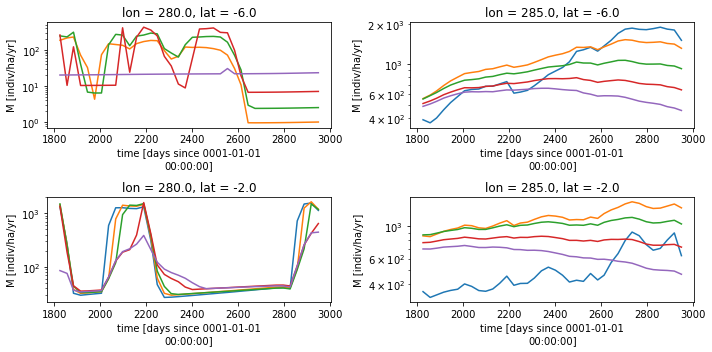

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.MORTALITY.attrs['long_name'] = 'M'
ds8.MORTALITY.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.MORTALITY.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.MORTALITY.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.MORTALITY.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

Now plotting out all of the mortality types for our first site above. Only, 1 (background), 2, (C starvation) and 5(termination) are important.
None has the sam magnitude as the total mortality output. Carbon starvation has a similar periodicity to the overall mortality. 

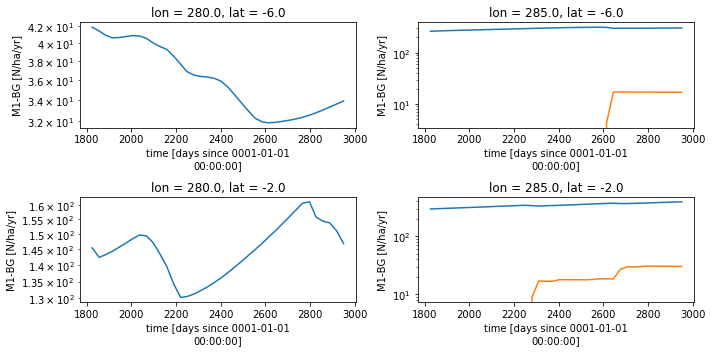

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sc = [1,2]
ds8.M1_SCLS.attrs['long_name'] = 'M1-BG'
ds8.M1_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.M1_SCLS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.M1_SCLS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.M1_SCLS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

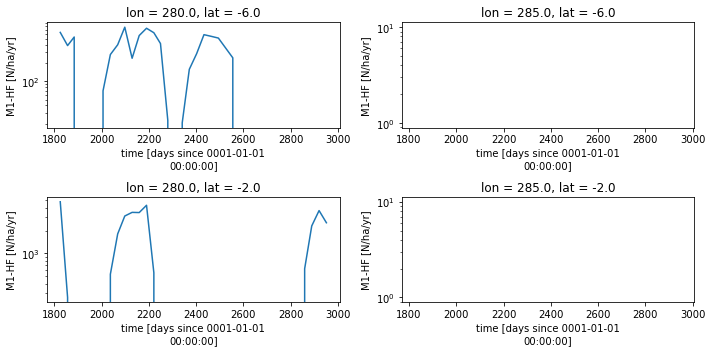

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sc = [1,2]
ds8.M2_SCLS.attrs['long_name'] = 'M1-HF'
ds8.M2_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.M2_SCLS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.M2_SCLS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.M2_SCLS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

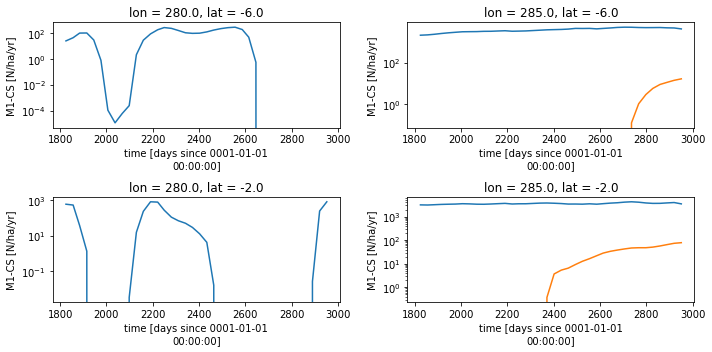

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sc = [1,2]
ds8.M3_SCLS.attrs['long_name'] = 'M1-CS'
ds8.M3_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.M3_SCLS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.M3_SCLS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.M3_SCLS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

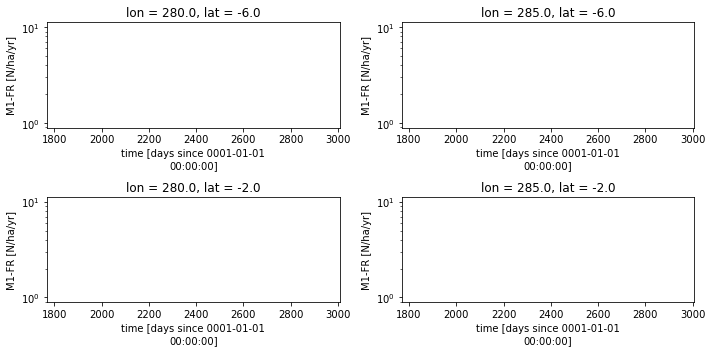

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sc = [1,2]
ds8.M5_SCLS.attrs['long_name'] = 'M1-FR'
ds8.M5_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, yscale='log')
ds8.M5_SCLS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, yscale='log')
ds8.M5_SCLS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, yscale='log')
ds8.M5_SCLS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, yscale='log')
plt.tight_layout()
plt.draw()

In [19]:
s=ds8.PFTbiomass.sizes
print(s)
tmax=s['time']-1


Frozen(OrderedDict([('time', 38), ('fates_levpft', 5), ('lat', 46), ('lon', 72)]))


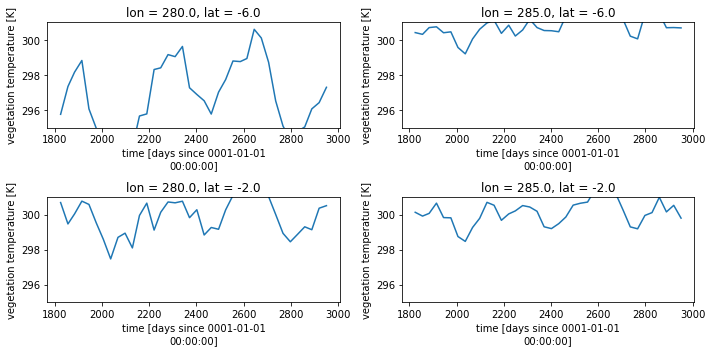

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ymn=295
ymx=301
ds8.TV.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, ylim=[ymn, ymx])
ds8.TV.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, ylim=[ymn, ymx])
ds8.TV.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, ylim=[ymn, ymx])
ds8.TV.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, ylim=[ymn, ymx])
plt.tight_layout()

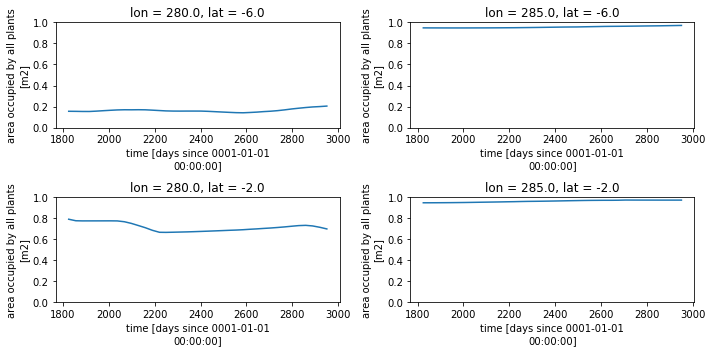

In [21]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ymn=0
ymx=1
ds8.AREA_PLANT.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, ylim=[ymn, ymx])
ds8.AREA_PLANT.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, ylim=[ymn, ymx])
ds8.AREA_PLANT.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, ylim=[ymn, ymx])
ds8.AREA_PLANT.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, ylim=[ymn, ymx])
plt.tight_layout()

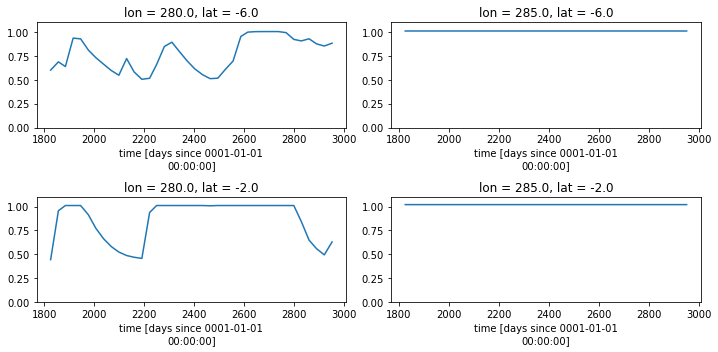

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ymn=0
ymx=1.1
bt= ds8.BTRANMN/ds8.AREA_PLANT
bt.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, ylim=[ymn, ymx])
bt.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, ylim=[ymn, ymx])
bt.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, ylim=[ymn, ymx])
bt.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, ylim=[ymn, ymx])
plt.tight_layout()

NameError: name 'lt' is not defined

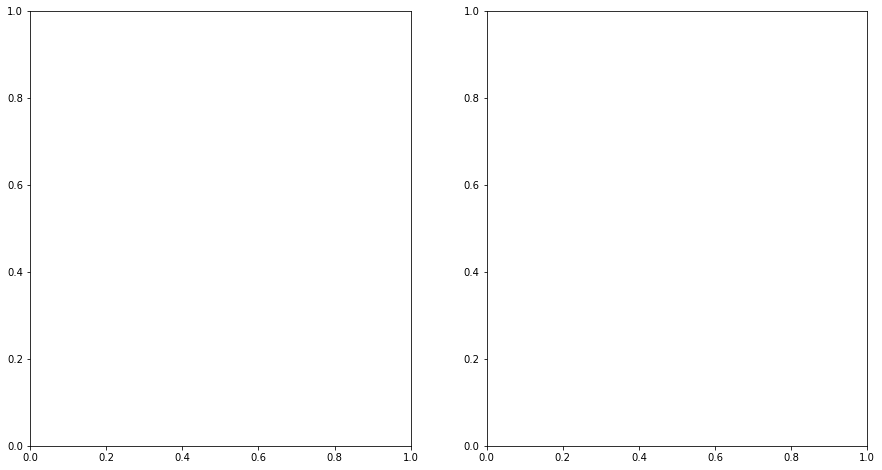

In [23]:
plt.rcParams['figure.figsize'] = [15, 8]
fig, ([ax0, ax1]) = plt.subplots(nrows=1, ncols=2)

ds8.TLAI.isel(time=1,lat=lt).plot(x='lon', y='lat', levels=8,robust=True,ax=ax0)
ds8.TLAI.isel(time=tmax,lat=lt).plot(x='lon', y='lat', levels=8,robust=True,ax=ax1)


In [ ]:
PFTnindivs = ds8.PFTnindivs.isel(time=tmax)
sumN=np.sum(PFTnindivs,0)
normN = PFTnindivs #/sumN
normN.plot( x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8,robust=True, vmax=0.4)

In [ ]:
PFTbiomass = ds8.PFTbiomass[tmax,0:6,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass/sumB
normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8,robust=True, vmax=0.4 )

In [ ]:
bt = ds8.BTRANMN/ds8.AREA_PLANT
#bt.plot(x='lon', y='lat', col='time', col_wrap=3, levels=8,robust=True)

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows=2, ncols=2)
tchoose=np.arange(2,tmax-1)
lt=np.arange(8,40)
print(lt.size)
fa=ds8.FIRE_AREA.isel(time=tchoose,lat=lt)
fa=np.sum(fa,0)/np.size(lt)
fi=ds8.FIRE_INTENSITY.isel(time=tchoose,lat=lt)
fi=np.sum(fi,0)/np.size(lt)
frs=ds8.FIRE_ROS.isel(time=tchoose,lat=lt)
frs=np.sum(frs,0)/np.size(lt)
ftfc=ds8.FIRE_TFC_ROS.isel(time=tchoose,lat=lt)
ftfc=np.sum(ftfc,0)/np.size(lt)
fa.plot(x='lon', y='lat', levels=8,robust=True,ax=ax0)
fi.plot(x='lon', y='lat', levels=8,robust=True,ax=ax1)
frs.plot(x='lon', y='lat', levels=8,robust=True,ax=ax2)
ftfc.plot(x='lon', y='lat', levels=8,robust=True,ax=ax3)

In [ ]:
print(np.size(lt))

In [ ]:
print(ds8)

Text(0.5, 1, 'TRM')

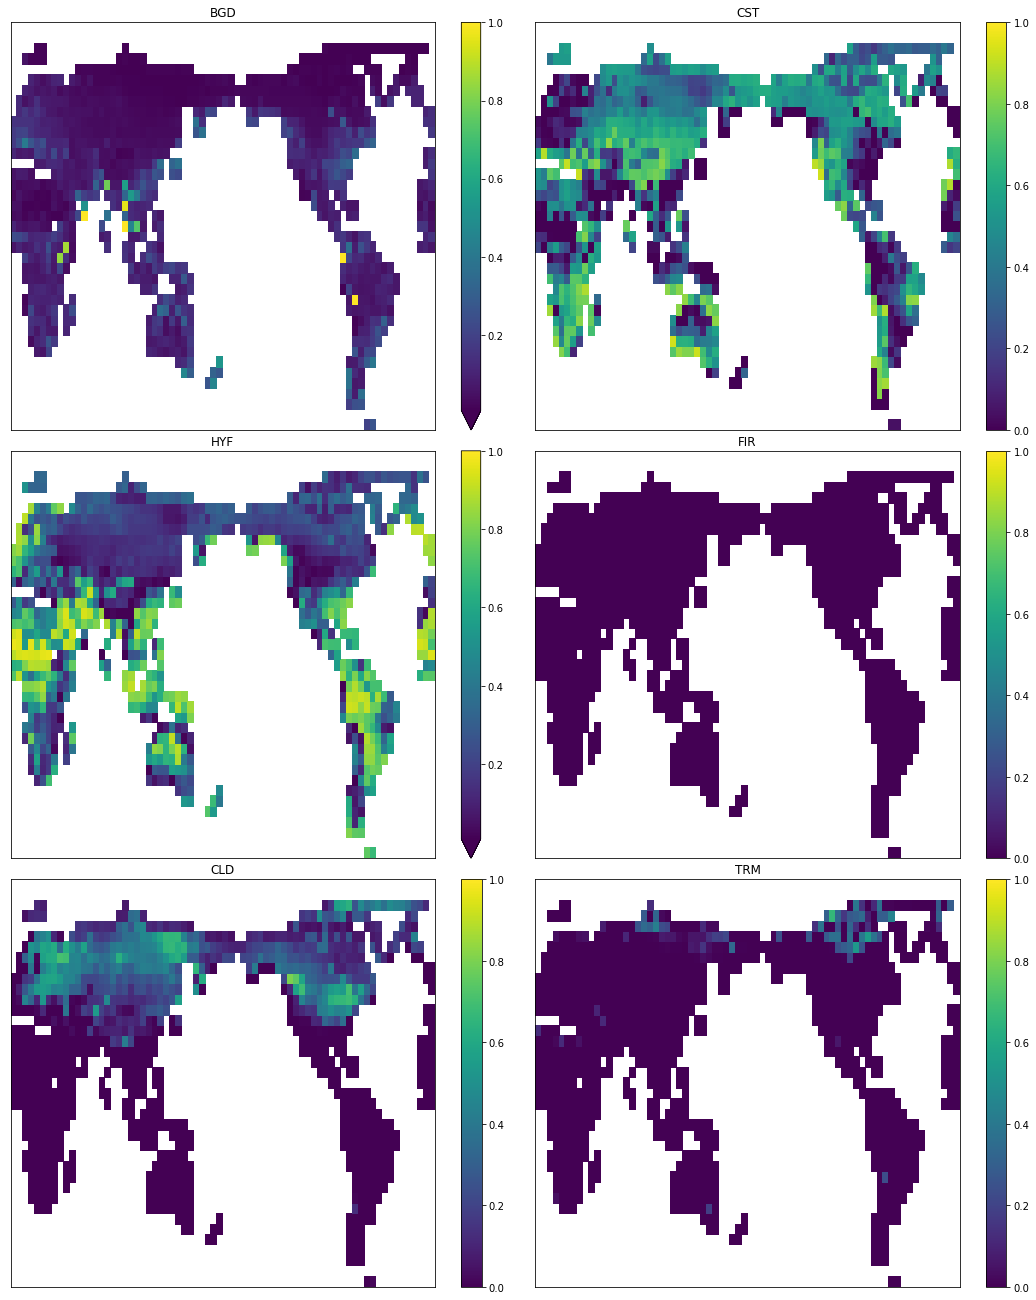

In [24]:
#fig, axes = plt.subplots(ncols=2, nrows=2)
plt.rcParams['figure.figsize'] = [15, 18]
fig, ([ax0, ax1], [ax2, ax3],[ax4 ,ax5]) = plt.subplots(nrows=3, ncols=2)
Mtot=np.sum(ds8.MORTALITY,1)
sumM1=np.sum(ds8.M1_SCLS,1)
tchoose=np.arange(24,tmax-1)

M1_f=np.sum(ds8.M1_SCLS,1)
M2_f=np.sum(ds8.M2_SCLS,1)
M3_f=np.sum(ds8.M3_SCLS,1)
M5_f=np.sum(ds8.M5_SCLS,1)
M6_f=np.sum(ds8.M6_SCLS,1)
M8_f=np.sum(ds8.M8_SCLS,1)


M1_f=np.sum(M1_f[:,7:46,:],0)
M2_f=np.sum(M2_f[:,7:46,:],0)
M3_f=np.sum(M3_f[:,7:46,:],0)
M5_f=np.sum(M5_f[:,7:46,:],0)
M6_f=np.sum(M6_f[:,7:46,:],0)
M8_f=np.sum(M8_f[:,7:46,:],0)

Mt=M1_f+M2_f+M3_f+M5_f+M8_f+M6_f
M1_f=M1_f/Mt
M2_f=M2_f/Mt
M3_f=M3_f/Mt
M5_f=M5_f/Mt
M6_f=M6_f/Mt
M8_f=M8_f/Mt

ax0.axes.get_xaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)
ax5.axes.get_xaxis().set_visible(False)
ax5.axes.get_yaxis().set_visible(False)

M1_f.plot(robust=True,ax=ax0,vmax=1)
M2_f.plot(robust=True,ax=ax1,label='none',vmax=1)
M3_f.plot(robust=True,ax=ax2,label='none',vmax=1)
M5_f.plot(robust=True,ax=ax3,label='none',vmax=1)
M8_f.plot(robust=True,ax=ax4,label='none',vmax=1)
M6_f.plot(robust=True,ax=ax5,label='none',vmax=1)


plt.tight_layout()

ax0.set_title('BGD')
ax1.set_title('CST')
ax2.set_title('HYF')
ax3.set_title('FIR')
ax4.set_title('CLD')
ax5.set_title('TRM')


In [25]:
fig.savefig('mortality_breakdown.png')

In [ ]:
LAIc = ds8.LAI_CANOPY_SCLS.isel(time=tmax)
print(LAIc)
LAIc.plot( x='lon', y='lat', col='fates_levscls', col_wrap=3, levels=8,robust=True)